In [1]:
#Wczytujemy biblioteki
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#wprowadzamy przydatne ustawienia dla wykresów
%matplotlib inline
plt.rc('figure', figsize=(10, 6))

In [3]:
#zmieniamy sposób wyświetlania liczb zmiennoprzecinkowych
np.set_printoptions(precision=4, suppress=True)
?np.set_printoptions

In [7]:
print(np.array([1.123456789]))

[1.1235]


In [8]:
test_df = pd.DataFrame({'klucz1' : ['a', 'a', 'b', 'b', 'a'],
                        'klucz2' : ['jeden', 'dwa', 'jeden', 'dwa', 'jeden'],
                        'dane1' : np.random.randn(5),
                        'dane2' : np.random.randn(5)})
test_df

klucz1 klucz2     dane1     dane2
0      a  jeden  0.105937  0.651027
1      a    dwa  0.113870  0.092675
2      b  jeden  0.450128 -0.552345
3      b    dwa -1.714871  1.059760
4      a  jeden -1.455092 -0.380408

In [9]:
#wykonujemy grupowanie zmiennej dane1 względem zmiennej klucz1. W wyniku otrzymujemy obiekt grupujący
grouped_df = test_df['dane1'].groupby(test_df['klucz1'])
grouped_df

In [10]:
grouped_df.value_counts()

klucz1  dane1    
a       -1.455092    1
         0.105937    1
         0.113870    1
b       -1.714871    1
         0.450128    1
Name: dane1, dtype: int64

In [11]:
grouped_df.mean()

klucz1
a   -0.411761
b   -0.632372
Name: dane1, dtype: float64

In [12]:
grouped_df.sum()

klucz1
a   -1.235284
b   -1.264743
Name: dane1, dtype: float64

In [13]:
grouped_df.std()

klucz1
a    0.903559
b    1.530885
Name: dane1, dtype: float64

In [15]:
#możemy również grupować zmienne względem wielu kluczy, wówczas tworzony jest tzw. indeks hierarchiczny
means_df1 = test_df['dane1'].groupby([test_df['klucz1'], test_df['klucz2']]).mean()
means_df2 = test_df['dane2'].groupby([test_df['klucz2'], test_df['klucz1']]).mean()
#means_df1
means_df2

klucz2  klucz1
dwa     a         0.092675
        b         1.059760
jeden   a         0.135309
        b        -0.552345
Name: dane2, dtype: float64

In [17]:
means_df1.unstack()

klucz2       dwa     jeden
klucz1                    
a       0.113870 -0.674577
b      -1.714871  0.450128

In [18]:
means_df2.unstack()

klucz1         a         b
klucz2                    
dwa     0.092675  1.059760
jeden   0.135309 -0.552345

In [29]:
test_df

klucz1 klucz2     dane1     dane2
0      a  jeden  0.105937  0.651027
1      a    dwa  0.113870  0.092675
2      b  jeden  0.450128 -0.552345
3      b    dwa -1.714871  1.059760
4      a  jeden -1.455092 -0.380408

In [30]:
#przydatną opcją jest możliwość zmapowania istniejących kluczy na tablice o odpowiedniej długości
states = np.array(['Ohio', 'California', 'California', 'Ohio', 'Ohio'])
years = np.array([2005, 2005, 2006, 2005, 2006])
test_df['dane1'].groupby([states, years]).mean()

California  2005    0.113870
            2006    0.450128
Ohio        2005   -0.804467
            2006   -1.455092
Name: dane1, dtype: float64

In [31]:
#oczywiście możemy wykonać grupowanie względem wybranych zmiennych dla całej ramki danych
test_df.groupby('klucz1').mean()

dane1     dane2
klucz1                    
a      -0.411761  0.121098
b      -0.632372  0.253708

In [33]:
df_agg = test_df.groupby(['klucz1', 'klucz2']).mean()

In [34]:
df_agg.unstack()

dane1               dane2          
klucz2       dwa     jeden       dwa     jeden
klucz1                                        
a       0.113870 -0.674577  0.092675  0.135309
b      -1.714871  0.450128  1.059760 -0.552345

In [35]:
df_agg

dane1     dane2
klucz1 klucz2                    
a      dwa     0.113870  0.092675
       jeden  -0.674577  0.135309
b      dwa    -1.714871  1.059760
       jeden   0.450128 -0.552345

In [36]:
test_df.groupby(['klucz1', 'klucz2']).size()

klucz1  klucz2
a       dwa       1
        jeden     2
b       dwa       1
        jeden     1
dtype: int64

In [37]:
#obiekty typu GroupBy można iterować po nazwach grupy oraz fragmentach danych
for name, group in test_df.groupby('klucz1'):
    print(name)
    print(group)

a
  klucz1 klucz2     dane1     dane2
0      a  jeden  0.105937  0.651027
1      a    dwa  0.113870  0.092675
4      a  jeden -1.455092 -0.380408
b
  klucz1 klucz2     dane1     dane2
2      b  jeden  0.450128 -0.552345
3      b    dwa -1.714871  1.059760


In [38]:
test_df[test_df.klucz1 == 'a']

klucz1 klucz2     dane1     dane2
0      a  jeden  0.105937  0.651027
1      a    dwa  0.113870  0.092675
4      a  jeden -1.455092 -0.380408

In [39]:
#to jest super :) ale klucze muszą być umieszczone w krotce
for (k1, k2), group in test_df.groupby(['klucz1', 'klucz2']):
    print((k1, k2))
    print(group)

('a', 'dwa')
  klucz1 klucz2    dane1     dane2
1      a    dwa  0.11387  0.092675
('a', 'jeden')
  klucz1 klucz2     dane1     dane2
0      a  jeden  0.105937  0.651027
4      a  jeden -1.455092 -0.380408
('b', 'dwa')
  klucz1 klucz2     dane1    dane2
3      b    dwa -1.714871  1.05976
('b', 'jeden')
  klucz1 klucz2     dane1     dane2
2      b  jeden  0.450128 -0.552345


In [43]:
#utworzone grupy i fragmenty danych można umieść w słowniku
slownik_df = dict(list(test_df.groupby('klucz1')))
slownik_df['a']
slownik_df['b']

klucz1 klucz2     dane1     dane2
2      b  jeden  0.450128 -0.552345
3      b    dwa -1.714871  1.059760

In [45]:
for k in slownik_df:
    print(slownik_df[k])

  klucz1 klucz2     dane1     dane2
0      a  jeden  0.105937  0.651027
1      a    dwa  0.113870  0.092675
4      a  jeden -1.455092 -0.380408
  klucz1 klucz2     dane1     dane2
2      b  jeden  0.450128 -0.552345
3      b    dwa -1.714871  1.059760


In [47]:
#domyślnie grupowanie odbywa się na osi 0, czyli po wierszach, ale możemy też wykonać grupowanie po kolumnach, np. względem typu danych
print(test_df.dtypes)
grouped = test_df.groupby(test_df.dtypes, axis=1)

klucz1     object
klucz2     object
dane1     float64
dane2     float64
dtype: object


In [49]:
grouped

In [48]:
for dtype, group in grouped:
    print(dtype)
    print(group)

float64
      dane1     dane2
0  0.105937  0.651027
1  0.113870  0.092675
2  0.450128 -0.552345
3 -1.714871  1.059760
4 -1.455092 -0.380408
object
  klucz1 klucz2
0      a  jeden
1      a    dwa
2      b  jeden
3      b    dwa
4      a  jeden


In [51]:
#gdy potrzebujemy wyboru danych do grupowania i przetwarzania możemy zastosować następujące polecenia
#df.groupby('klucz1')['dane1']   -> df['dane1'].groupby(df['klucz1'])
#df.groupby('klucz1')[['dane2']] -> df[['dane2']].groupby(df['klucz1'])

#test_df.groupby(['klucz1', 'klucz2'])[['dane2']].mean()
type(test_df.groupby(['klucz1', 'klucz2'])['dane1'].mean())

pandas.core.series.Series

In [54]:
type(test_df.groupby(['klucz1', 'klucz2'])[['dane1']].mean())

pandas.core.frame.DataFrame

In [55]:
type(test_df.groupby(['klucz1', 'klucz2'])['dane1'].mean())

pandas.core.series.Series

In [4]:
#stworzymy teraz nową ramkę danych
osoby = pd.DataFrame(np.random.randn(5, 5),
                      columns=['a', 'b', 'c', 'd', 'e'],
                      index=['Jan', 'Ala', 'Robert', 'Kornelia', 'Patryk'])
osoby.iloc[2:3, [1, 2]] = np.nan # Dodaj kilka wartości typu NA.
osoby

a         b         c         d         e
Jan      -1.769171  0.606682 -0.984639 -1.162283 -0.348064
Ala      -1.669448  0.962202 -2.125832 -0.487697  0.140424
Robert    0.105661       NaN       NaN -0.146452  0.709147
Kornelia  0.017999  1.036292 -0.318815 -0.294845 -0.581481
Patryk    0.622258 -0.993067 -1.429606  0.145005  2.064289

In [5]:
#następnie robimy mapowanie określające grupy, budujemy słownik
mapowanie = {'a': 'czerwony', 'b': 'czerwony', 'c': 'niebieski',
           'd': 'niebieski', 'e': 'czerwony', 'f' : 'pomarańczowy'}
mapowanie

{'a': 'czerwony',
 'b': 'czerwony',
 'c': 'niebieski',
 'd': 'niebieski',
 'e': 'czerwony',
 'f': 'pomarańczowy'}

In [9]:
#do funkcji groupby można przekazać słownik, nieużywane klucze są OK, patrz 'f'
#Uwaga na zmianę osi grupowania
by_column = osoby.groupby(mapowanie, axis=1)
by_column.sum()

czerwony  niebieski
Jan      -1.510554  -2.146923
Ala      -0.566823  -2.613529
Robert    0.814808  -0.146452
Kornelia  0.472810  -0.613660
Patryk    1.693479  -1.284601

In [8]:
by_column.groups

{'czerwony': Index(['a', 'b', 'e'], dtype='object'),
 'niebieski': Index(['c', 'd'], dtype='object')}

In [11]:
#do groupby można przekazać także obiekt typu Series
map_series = pd.Series(mapowanie)
map_series
osoby.groupby(map_series, axis=1).count()

czerwony  niebieski
Jan              3          2
Ala              3          2
Robert           2          1
Kornelia         3          2
Patryk           3          2

In [14]:
#grupowanie możemy również wykonać przy użyciu funkcji
#wówczas funkcja jako argument groupby jest wykonywana na indeksie, a wynik tworzy grupę
osoby.groupby(len).sum()

a         b         c         d         e
3 -3.438620  1.568884 -3.110471 -1.649981 -0.207641
6  0.727918 -0.993067 -1.429606 -0.001448  2.773435
8  0.017999  1.036292 -0.318815 -0.294845 -0.581481

In [13]:
len("Jan")

3

In [15]:
#mieszanie funkcji ze słownikami, tbalicami lub seriami również nie stanowi problemu
key_list = ['jeden', 'jeden', 'jeden', 'dwa', 'dwa']
osoby.groupby([len, key_list]).min()

a         b         c         d         e
3 jeden -1.769171  0.606682 -2.125832 -1.162283 -0.348064
6 dwa    0.622258 -0.993067 -1.429606  0.145005  2.064289
  jeden  0.105661       NaN       NaN -0.146452  0.709147
8 dwa    0.017999  1.036292 -0.318815 -0.294845 -0.581481

In [33]:
#ważnym zagadnieniem jest agregowanie zbiorów indeksowanych hierarchicznie
#przed grupowaniem należy określić nazwę lub numer poziomu
columns = pd.MultiIndex.from_arrays([['US', 'US', 'US', 'JP', 'JP'],
                                    ['1', '2', '3', '1', '2']],
                                    names=['miasto', 'tenor'])
hier_df = pd.DataFrame(np.random.randn(4, 5), columns=columns)
hier_df

miasto        US                            JP          
tenor          1         2         3         1         2
0       0.093170 -1.391195  0.667885  0.921792 -0.922643
1      -0.213967 -1.771124  0.863954 -0.904470  0.443044
2      -0.043845  0.305940 -0.533897  1.759333  1.105288
3      -0.024126 -0.514604 -1.137631  0.765677  1.553367

In [35]:
hier_df.JP["1"]

0    0.921792
1   -0.904470
2    1.759333
3    0.765677
Name: 1, dtype: float64

In [27]:
hier_df.groupby(level='tenor', axis=1).count()

tenor  1  3  5
0      2  2  1
1      2  2  1
2      2  2  1
3      2  2  1

In [36]:
test_df = pd.DataFrame({'klucz1' : ['a', 'a', 'b', 'b', 'a'],
                        'klucz2' : ['jeden', 'dwa', 'jeden', 'dwa', 'jeden'],
                        'dane1' : np.random.randn(5),
                        'dane2' : np.random.randn(5)})
test_df

klucz1 klucz2     dane1     dane2
0      a  jeden -1.551042  1.148901
1      a    dwa -1.679107 -0.118822
2      b  jeden  0.940863  0.320422
3      b    dwa  1.688214 -0.965699
4      a  jeden -1.631174 -0.013503

In [38]:
#większość funkcji możliwych do wykonania na kolumnach ramek danych lub obiektach typu Series można zastosować również do obiektów GroupBy
grouped = test_df.groupby('klucz1')
aaa = grouped['dane1']
#quantile(0.9)

In [39]:
aaa.unique()

klucz1
a    [-1.5510420438619708, -1.6791065263565472, -1....
b             [0.9408631023490271, 1.6882140405709862]
Name: dane1, dtype: object

In [40]:
#oczywiście własne funkcje są również akceptowane
def peak_to_peak(arr):
    return arr.max() - arr.min()

In [41]:
grouped.agg(peak_to_peak)

dane1     dane2
klucz1                    
a       0.128064  1.267723
b       0.747351  1.286121

In [43]:
aaa = grouped.describe()

In [47]:
aaa.dane1["min"]

klucz1
a   -1.679107
b    0.940863
Name: min, dtype: float64

In [48]:
aaa

dane1                                                              \
       count      mean       std       min       25%       50%       75%   
klucz1                                                                     
a        3.0 -1.620441  0.064703 -1.679107 -1.655140 -1.631174 -1.591108   
b        2.0  1.314539  0.528457  0.940863  1.127701  1.314539  1.501376   

                 dane2                                                    \
             max count      mean       std       min       25%       50%   
klucz1                                                                     
a      -1.551042   3.0  0.338859  0.703491 -0.118822 -0.066163 -0.013503   
b       1.688214   2.0 -0.322638  0.909425 -0.965699 -0.644168 -0.322638   

                            
             75%       max  
klucz1                      
a       0.567699  1.148901  
b      -0.001108  0.320422

In [49]:
#wczytamy zbiór tips.csv
tips = pd.read_csv('../dane/tips.csv')
tips

total_bill   tip smoker   day    time  size
0         16.99  1.01     No   Sun  Dinner     2
1         10.34  1.66     No   Sun  Dinner     3
2         21.01  3.50     No   Sun  Dinner     3
3         23.68  3.31     No   Sun  Dinner     2
4         24.59  3.61     No   Sun  Dinner     4
..          ...   ...    ...   ...     ...   ...
239       29.03  5.92     No   Sat  Dinner     3
240       27.18  2.00    Yes   Sat  Dinner     2
241       22.67  2.00    Yes   Sat  Dinner     2
242       17.82  1.75     No   Sat  Dinner     2
243       18.78  3.00     No  Thur  Dinner     2

[244 rows x 6 columns]

In [50]:
#tworzymy kolumnę z wartością procentową, jaką stanowi napiwek w stosunku do całego rachunku
tips['tip_pct'] = tips['tip'] / tips['total_bill']
tips[:6]

total_bill   tip smoker  day    time  size   tip_pct
0       16.99  1.01     No  Sun  Dinner     2  0.059447
1       10.34  1.66     No  Sun  Dinner     3  0.160542
2       21.01  3.50     No  Sun  Dinner     3  0.166587
3       23.68  3.31     No  Sun  Dinner     2  0.139780
4       24.59  3.61     No  Sun  Dinner     4  0.146808
5       25.29  4.71     No  Sun  Dinner     4  0.186240

In [51]:
#grupowanie dokonamy na poziomie dnia tygodnia i informacji czy osoba była paliła papierosy
grouped = tips.groupby(['day', 'smoker'])

In [53]:
grouped.groups

{('Fri', 'No'): Int64Index([91, 94, 99, 223], dtype='int64'),
 ('Fri',
  'Yes'): Int64Index([90, 92, 93, 95, 96, 97, 98, 100, 101, 220, 221, 222, 224, 225,
             226],
            dtype='int64'),
 ('Sat',
  'No'): Int64Index([ 19,  20,  21,  22,  23,  24,  25,  26,  27,  28,  29,  30,  31,
              32,  33,  34,  35,  36,  37,  38,  39,  40,  57,  59,  64,  65,
              66,  68,  70,  71,  74,  75, 104, 108, 110, 111, 212, 227, 228,
             232, 233, 235, 238, 239, 242],
            dtype='int64'),
 ('Sat',
  'Yes'): Int64Index([ 56,  58,  60,  61,  62,  63,  67,  69,  72,  73,  76, 102, 103,
             105, 106, 107, 109, 168, 169, 170, 171, 206, 207, 208, 209, 210,
             211, 213, 214, 215, 216, 217, 218, 219, 229, 230, 231, 234, 236,
             237, 240, 241],
            dtype='int64'),
 ('Sun',
  'No'): Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
              13,  14,  15,  16,  17,  18,  41,  42,  43,  44,  45,  4

In [71]:
grouped.obj.columns

Index(['total_bill', 'tip', 'smoker', 'day', 'time', 'size', 'tip_pct'], dtype='object')

In [54]:
#interesuje nas średnia nowej zmiennej 
grouped_pct = grouped['tip_pct']
grouped_pct.agg('mean')

day   smoker
Fri   No        0.151650
      Yes       0.174783
Sat   No        0.158048
      Yes       0.147906
Sun   No        0.160113
      Yes       0.187250
Thur  No        0.160298
      Yes       0.163863
Name: tip_pct, dtype: float64

In [58]:
#w ten sposób możemy budować ramki danych zawierające stworzone przez nas cechy, ponieważ do funkcji agregującej możemy przekazać listę funkcji
aaa = grouped_pct.agg(['mean', 'std', peak_to_peak]).unstack()

In [63]:
aaa["std"]["Yes"].values

array([0.0513, 0.0614, 0.1541, 0.0394])

In [64]:
#tak tworzonym kolumnom można nadawać własne nazwy
grouped_pct.agg([('średnia', 'mean'), ('odch_std', np.std)])

średnia  odch_std
day  smoker                    
Fri  No      0.151650  0.028123
     Yes     0.174783  0.051293
Sat  No      0.158048  0.039767
     Yes     0.147906  0.061375
Sun  No      0.160113  0.042347
     Yes     0.187250  0.154134
Thur No      0.160298  0.038774
     Yes     0.163863  0.039389

In [69]:
#tę samą listę funkcji agregujących można zastosować do wybranych zmiennych
functions = ['count', 'mean', 'max']
result = grouped['tip_pct', 'total_bill'].agg(functions)
result

tip_pct                     total_bill                  
              count      mean       max      count       mean    max
day  smoker                                                         
Fri  No           4  0.151650  0.187735          4  18.420000  22.75
     Yes         15  0.174783  0.263480         15  16.813333  40.17
Sat  No          45  0.158048  0.291990         45  19.661778  48.33
     Yes         42  0.147906  0.325733         42  21.276667  50.81
Sun  No          57  0.160113  0.252672         57  20.506667  48.17
     Yes         19  0.187250  0.710345         19  24.120000  45.35
Thur No          45  0.160298  0.266312         45  17.113111  41.19
     Yes         17  0.163863  0.241255         17  19.190588  43.11

In [72]:
#tu również kolumnom można nadać własne nazwy
ftuples = [('Durchschnitt', 'mean'), ('Abweichung', np.var)]
grouped['tip_pct', 'total_bill'].agg(ftuples)

tip_pct              total_bill            
            Durchschnitt Abweichung Durchschnitt  Abweichung
day  smoker                                                 
Fri  No         0.151650   0.000791    18.420000   25.596333
     Yes        0.174783   0.002631    16.813333   82.562438
Sat  No         0.158048   0.001581    19.661778   79.908965
     Yes        0.147906   0.003767    21.276667  101.387535
Sun  No         0.160113   0.001793    20.506667   66.099980
     Yes        0.187250   0.023757    24.120000  109.046044
Thur No         0.160298   0.001503    17.113111   59.625081
     Yes        0.163863   0.001551    19.190588   69.808518

In [74]:
#akceptowalne są również słowniki
#grouped.agg({'tip' : np.max, 'size' : 'sum'})
grouped.agg({'tip_pct' : ['min', 'max', 'mean', 'std'], 'size' : 'sum'})

tip_pct                               size
                  min       max      mean       std  sum
day  smoker                                             
Fri  No      0.120385  0.187735  0.151650  0.028123    9
     Yes     0.103555  0.263480  0.174783  0.051293   31
Sat  No      0.056797  0.291990  0.158048  0.039767  115
     Yes     0.035638  0.325733  0.147906  0.061375  104
Sun  No      0.059447  0.252672  0.160113  0.042347  167
     Yes     0.065660  0.710345  0.187250  0.154134   49
Thur No      0.072961  0.266312  0.160298  0.038774  112
     Yes     0.090014  0.241255  0.163863  0.039389   40

In [75]:
#przykład jak wyłączyć indeks hierarchiczny, który nie zawsze jest potrzebny
tips.groupby(['day', 'smoker'], as_index=False).mean()

day smoker  total_bill       tip      size   tip_pct
0   Fri     No   18.420000  2.812500  2.250000  0.151650
1   Fri    Yes   16.813333  2.714000  2.066667  0.174783
2   Sat     No   19.661778  3.102889  2.555556  0.158048
3   Sat    Yes   21.276667  2.875476  2.476190  0.147906
4   Sun     No   20.506667  3.167895  2.929825  0.160113
5   Sun    Yes   24.120000  3.516842  2.578947  0.187250
6  Thur     No   17.113111  2.673778  2.488889  0.160298
7  Thur    Yes   19.190588  3.030000  2.352941  0.163863

In [78]:
#chcemy wybrać pięć najwyższych wartości tip_pct z podziałem na grupy
#najpierw tworzymy funkcję wybierającą 5 największych wartości z danej kolumny
def top(df, n=5, column='tip_pct'):
    return df.sort_values(by=column)[-n:]
top(tips, n=10)

total_bill   tip smoker   day    time  size   tip_pct
51        10.29  2.60     No   Sun  Dinner     2  0.252672
221       13.42  3.48    Yes   Fri   Lunch     2  0.259314
93        16.32  4.30    Yes   Fri  Dinner     2  0.263480
149        7.51  2.00     No  Thur   Lunch     2  0.266312
109       14.31  4.00    Yes   Sat  Dinner     2  0.279525
183       23.17  6.50    Yes   Sun  Dinner     4  0.280535
232       11.61  3.39     No   Sat  Dinner     2  0.291990
67         3.07  1.00    Yes   Sat  Dinner     1  0.325733
178        9.60  4.00    Yes   Sun  Dinner     2  0.416667
172        7.25  5.15    Yes   Sun  Dinner     2  0.710345

In [81]:
#a następnie korzystamy z funkcji apply
tips.groupby('smoker').apply(top)

total_bill   tip smoker   day    time  size   tip_pct
smoker                                                           
No     88        24.71  5.85     No  Thur   Lunch     2  0.236746
       185       20.69  5.00     No   Sun  Dinner     5  0.241663
       51        10.29  2.60     No   Sun  Dinner     2  0.252672
       149        7.51  2.00     No  Thur   Lunch     2  0.266312
       232       11.61  3.39     No   Sat  Dinner     2  0.291990
Yes    109       14.31  4.00    Yes   Sat  Dinner     2  0.279525
       183       23.17  6.50    Yes   Sun  Dinner     4  0.280535
       67         3.07  1.00    Yes   Sat  Dinner     1  0.325733
       178        9.60  4.00    Yes   Sun  Dinner     2  0.416667
       172        7.25  5.15    Yes   Sun  Dinner     2  0.710345

In [82]:
#jeżeli do funkcji top chcemy przekazać inne niż domyślne argumenty możemy to zrobić
#wprowadzając kolejne agrgumenty funkcji apply (genialne)
tips.groupby(['smoker', 'day']).apply(top, n=3, column='total_bill')

total_bill    tip smoker   day    time  size   tip_pct
smoker day                                                             
No     Fri  223       15.98   3.00     No   Fri   Lunch     3  0.187735
            91        22.49   3.50     No   Fri  Dinner     2  0.155625
            94        22.75   3.25     No   Fri  Dinner     2  0.142857
       Sat  23        39.42   7.58     No   Sat  Dinner     4  0.192288
            59        48.27   6.73     No   Sat  Dinner     4  0.139424
            212       48.33   9.00     No   Sat  Dinner     4  0.186220
       Sun  11        35.26   5.00     No   Sun  Dinner     4  0.141804
            112       38.07   4.00     No   Sun  Dinner     3  0.105070
            156       48.17   5.00     No   Sun  Dinner     6  0.103799
       Thur 141       34.30   6.70     No  Thur   Lunch     6  0.195335
            85        34.83   5.17     No  Thur   Lunch     4  0.148435
            142       41.19   5.00     No  Thur   Lunch     5  0.121389
Yes    Fri  96        27.28   4.00    Yes   Fri  Dinner     2  0.146628
            90        28.97   3.00    Yes   Fri  Dinner     2  0.103555
            95        40.17   4.73    Yes   Fri  Dinner     4  0.117750
       Sat  207       38.73   3.00    Yes   Sat  Dinner     4  0.077459
            102       44.30   2.50    Yes   Sat  Dinner     3  0.056433
            170       50.81  10.00    Yes   Sat  Dinner     3  0.196812
       Sun  180       34.65   3.68    Yes   Sun  Dinner     4  0.106205
            184       40.55   3.00    Yes   Sun  Dinner     2  0.073983
            182       45.35   3.50    Yes   Sun  Dinner     3  0.077178
       Thur 192       28.44   2.56    Yes  Thur   Lunch     2  0.090014
            83        32.68   5.00    Yes  Thur   Lunch     2  0.152999
            197       43.11   5.00    Yes  Thur   Lunch     4  0.115982

In [83]:
#przykład użycia funkcji lambda w połączeniu z apply
#podejście nr 1
result = tips.groupby('smoker')['tip_pct'].describe()
#result.T
#result.unstack('smoker')

In [85]:
result.T

smoker          No        Yes
count   151.000000  93.000000
mean      0.159328   0.163196
std       0.039910   0.085119
min       0.056797   0.035638
25%       0.136906   0.106771
50%       0.155625   0.153846
75%       0.185014   0.195059
max       0.291990   0.710345

In [88]:
result.unstack('smoker')

93.0

In [89]:
#podejście nr 2
f = lambda x: x.describe()
(tips.groupby('smoker')['tip_pct'].apply(f)).unstack('smoker')

smoker          No        Yes
count   151.000000  93.000000
mean      0.159328   0.163196
std       0.039910   0.085119
min       0.056797   0.035638
25%       0.136906   0.106771
50%       0.155625   0.153846
75%       0.185014   0.195059
max       0.291990   0.710345

In [91]:
#usunięcie indeksu hierarchicznego
tips.groupby('smoker', group_keys=False).apply(top).reset_index()

index  total_bill   tip smoker   day    time  size   tip_pct
0     88       24.71  5.85     No  Thur   Lunch     2  0.236746
1    185       20.69  5.00     No   Sun  Dinner     5  0.241663
2     51       10.29  2.60     No   Sun  Dinner     2  0.252672
3    149        7.51  2.00     No  Thur   Lunch     2  0.266312
4    232       11.61  3.39     No   Sat  Dinner     2  0.291990
5    109       14.31  4.00    Yes   Sat  Dinner     2  0.279525
6    183       23.17  6.50    Yes   Sun  Dinner     4  0.280535
7     67        3.07  1.00    Yes   Sat  Dinner     1  0.325733
8    178        9.60  4.00    Yes   Sun  Dinner     2  0.416667
9    172        7.25  5.15    Yes   Sun  Dinner     2  0.710345

## Zadanie 1

In [92]:
dane_wezel = pd.read_csv('../dane/dane_z_wezla.csv')
dane_wezel

Modul  Identyfikator  Lokalizacja         Data odczytu  \
0      70041029       13213086  Jakis adres  2015-12-31 23:55:00   
1      70041029       13213086  Jakis adres  2015-12-31 23:40:00   
2      70041029       13213086  Jakis adres  2015-12-31 23:25:00   
3      70041029       13213086  Jakis adres  2015-12-31 23:10:00   
4      70041029       13213086  Jakis adres  2015-12-31 22:55:00   
...         ...            ...          ...                  ...   
34517  70041029       13213086  Jakis adres  2015-01-01 01:10:00   
34518  70041029       13213086  Jakis adres  2015-01-01 00:55:00   
34519  70041029       13213086  Jakis adres  2015-01-01 00:40:00   
34520  70041029       13213086  Jakis adres  2015-01-01 00:25:00   
34521  70041029       13213086  Jakis adres  2015-01-01 00:10:00   

          Data rejestracji  Energia [GJ]  Przeplyw [l/h]  \
0      2016-01-01 00:13:56        989.64            1273   
1      2015-12-31 23:58:56        989.60            1249   
2      2015-12-31 23:43:56        989.56             958   
3      2015-12-31 23:28:56        989.52            1064   
4      2015-12-31 23:13:56        989.47             996   
...                    ...           ...             ...   
34517  2015-01-01 01:28:56        340.20             643   
34518  2015-01-01 01:13:56        340.17             630   
34519  2015-01-01 00:58:56        340.15             623   
34520  2015-01-01 00:43:56        340.13             642   
34521  2015-01-01 00:28:56        340.10             673   

       Temperatura zasilania [C]  Temperatura powrotu [C]  \
0                           95.5                     61.3   
1                           96.8                     64.9   
2                          103.0                     63.5   
3                          100.5                     63.6   
4                          100.2                     60.3   
...                          ...                      ...   
34517                       80.6                     45.1   
34518                       80.7                     44.3   
34519                       80.2                     45.4   
34520                       79.8                     45.4   
34521                       78.9                     45.6   

       Roznica temperatur [C]  Objetosc [m2]  Godziny pracy [h]  Moc [kW]  \
0                       34.18        7447.07              17544      50.2   
1                       31.88        7446.75              17544      45.4   
2                       39.50        7446.47              17544      43.0   
3                       36.88        7446.22              17544      44.6   
4                       39.88        7445.96              17544      46.4   
...                       ...            ...                ...       ...   
34517                   35.44        2544.26               8784      26.3   
34518                   36.47        2544.10               8784      26.5   
34519                   34.78        2543.95               8784      24.9   
34520                   34.31        2543.79               8784      26.1   
34521                   33.26        2543.62               8784      25.8   

       Kod info Numer klienta  Objetosc wodomierza 1 [m2]  \
0             0             -                         0.1   
1             0             -                         0.1   
2             0             -                         0.1   
3             0             -                         0.1   
4             0             -                         0.1   
...         ...           ...                         ...   
34517         0             -                         0.0   
34518         0             -                         0.0   
34519         0             -                         0.0   
34520         0             -                         0.0   
34521         0             -                         0.0   

       Objetosc wodomierza 2 [m2]  
0                               0  
1        

In [93]:
dane_wezel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34522 entries, 0 to 34521
Data columns (total 17 columns):
Modul                         34522 non-null int64
Identyfikator                 34522 non-null int64
Lokalizacja                   34522 non-null object
Data odczytu                  34522 non-null object
Data rejestracji              34522 non-null object
Energia [GJ]                  34522 non-null float64
Przeplyw [l/h]                34522 non-null int64
Temperatura zasilania [C]     34522 non-null float64
Temperatura powrotu [C]       34522 non-null float64
Roznica temperatur [C]        34522 non-null float64
Objetosc [m2]                 34522 non-null float64
Godziny pracy [h]             34522 non-null int64
Moc [kW]                      34522 non-null float64
Kod info                      34522 non-null int64
Numer klienta                 34522 non-null object
Objetosc wodomierza 1 [m2]    34522 non-null float64
Objetosc wodomierza 2 [m2]    34522 non-null int64
dtypes

In [94]:
dane_wezel.columns

Index(['Modul', 'Identyfikator', 'Lokalizacja', 'Data odczytu',
       'Data rejestracji', 'Energia [GJ]', 'Przeplyw [l/h]',
       'Temperatura zasilania [C]', 'Temperatura powrotu [C]',
       'Roznica temperatur [C]', 'Objetosc [m2]', 'Godziny pracy [h]',
       'Moc [kW]', 'Kod info', 'Numer klienta', 'Objetosc wodomierza 1 [m2]',
       'Objetosc wodomierza 2 [m2]'],
      dtype='object')

In [97]:
dane_wezel["Data odczytu"]

0        2015-12-31 23:55:00
1        2015-12-31 23:40:00
2        2015-12-31 23:25:00
3        2015-12-31 23:10:00
4        2015-12-31 22:55:00
                ...         
34517    2015-01-01 01:10:00
34518    2015-01-01 00:55:00
34519    2015-01-01 00:40:00
34520    2015-01-01 00:25:00
34521    2015-01-01 00:10:00
Name: Data odczytu, Length: 34522, dtype: object

In [96]:
from datetime import datetime

In [98]:
dane_wezel['data'] =  pd.to_datetime(dane_wezel["Data odczytu"],
                                     format='%Y-%m-%d %H:%M:%S')

In [100]:
dane_wezel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34522 entries, 0 to 34521
Data columns (total 18 columns):
Modul                         34522 non-null int64
Identyfikator                 34522 non-null int64
Lokalizacja                   34522 non-null object
Data odczytu                  34522 non-null object
Data rejestracji              34522 non-null object
Energia [GJ]                  34522 non-null float64
Przeplyw [l/h]                34522 non-null int64
Temperatura zasilania [C]     34522 non-null float64
Temperatura powrotu [C]       34522 non-null float64
Roznica temperatur [C]        34522 non-null float64
Objetosc [m2]                 34522 non-null float64
Godziny pracy [h]             34522 non-null int64
Moc [kW]                      34522 non-null float64
Kod info                      34522 non-null int64
Numer klienta                 34522 non-null object
Objetosc wodomierza 1 [m2]    34522 non-null float64
Objetosc wodomierza 2 [m2]    34522 non-null int64
data  

In [103]:
def create_week_number(date_in_column):
    return date_in_column.isocalendar()[1]

In [102]:
dane_wezel.data[0].isocalendar()

(2015, 53, 4)

In [104]:
dane_wezel['week'] = dane_wezel.data.apply(create_week_number)

In [105]:
dane_wezel

Modul  Identyfikator  Lokalizacja         Data odczytu  \
0      70041029       13213086  Jakis adres  2015-12-31 23:55:00   
1      70041029       13213086  Jakis adres  2015-12-31 23:40:00   
2      70041029       13213086  Jakis adres  2015-12-31 23:25:00   
3      70041029       13213086  Jakis adres  2015-12-31 23:10:00   
4      70041029       13213086  Jakis adres  2015-12-31 22:55:00   
...         ...            ...          ...                  ...   
34517  70041029       13213086  Jakis adres  2015-01-01 01:10:00   
34518  70041029       13213086  Jakis adres  2015-01-01 00:55:00   
34519  70041029       13213086  Jakis adres  2015-01-01 00:40:00   
34520  70041029       13213086  Jakis adres  2015-01-01 00:25:00   
34521  70041029       13213086  Jakis adres  2015-01-01 00:10:00   

          Data rejestracji  Energia [GJ]  Przeplyw [l/h]  \
0      2016-01-01 00:13:56        989.64            1273   
1      2015-12-31 23:58:56        989.60            1249   
2      2015-12-31 23:43:56        989.56             958   
3      2015-12-31 23:28:56        989.52            1064   
4      2015-12-31 23:13:56        989.47             996   
...                    ...           ...             ...   
34517  2015-01-01 01:28:56        340.20             643   
34518  2015-01-01 01:13:56        340.17             630   
34519  2015-01-01 00:58:56        340.15             623   
34520  2015-01-01 00:43:56        340.13             642   
34521  2015-01-01 00:28:56        340.10             673   

       Temperatura zasilania [C]  Temperatura powrotu [C]  \
0                           95.5                     61.3   
1                           96.8                     64.9   
2                          103.0                     63.5   
3                          100.5                     63.6   
4                          100.2                     60.3   
...                          ...                      ...   
34517                       80.6                     45.1   
34518                       80.7                     44.3   
34519                       80.2                     45.4   
34520                       79.8                     45.4   
34521                       78.9                     45.6   

       Roznica temperatur [C]  Objetosc [m2]  Godziny pracy [h]  Moc [kW]  \
0                       34.18        7447.07              17544      50.2   
1                       31.88        7446.75              17544      45.4   
2                       39.50        7446.47              17544      43.0   
3                       36.88        7446.22              17544      44.6   
4                       39.88        7445.96              17544      46.4   
...                       ...            ...                ...       ...   
34517                   35.44        2544.26               8784      26.3   
34518                   36.47        2544.10               8784      26.5   
34519                   34.78        2543.95               8784      24.9   
34520                   34.31        2543.79               8784      26.1   
34521                   33.26        2543.62               8784      25.8   

       Kod info Numer klienta  Objetosc wodomierza 1 [m2]  \
0             0             -                         0.1   
1             0             -                         0.1   
2             0             -                         0.1   
3             0             -                         0.1   
4             0             -                         0.1   
...         ...           ...                         ...   
34517         0             -                         0.0   
34518         0             -                         0.0   
34519         0             -                         0.0   
34520         0             -                         0.0   
34521         0             -                         0.0   

       Objetosc wodomierza 2 [m2]                data  week  
0                  

In [106]:
dane_wezel.week.unique()

array([53, 52, 51, 50, 49, 48, 47, 46, 45, 44, 43, 42, 41, 40, 39, 38, 37,
       36, 35, 34, 33, 32, 31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20,
       19, 18, 17, 16, 15, 14, 13, 12, 11, 10,  9,  8,  7,  6,  5,  4,  3,
        2,  1], dtype=int64)

In [107]:
grouped_week = dane_wezel['Roznica temperatur [C]'].groupby(dane_wezel['week']).mean()
grouped_week

week
1         34.067734
2         37.224940
3         34.628155
4         38.060133
5         37.535387
6         39.872470
7         36.964567
8         36.627783
9         34.479435
10        34.613713
11        33.185476
12        32.170774
13        32.710709
14        33.515729
15        32.173690
16        32.004360
17        31.617068
18        30.250244
19        30.343705
20        30.491369
21        29.326548
22        27.721159
23        24.142882
24        26.892961
25        27.043854
26        27.491443
27        25.346910
28        25.388318
29        25.013581
30        25.817277
31        25.238722
32        23.208758
33        24.882827
34        24.218988
35        24.900848
36        24.256429
37        22.324286
38    319592.027039
39    382938.302645
40        28.632426
41        29.909048
42        31.523571
43        32.047560
44        30.072242
45        30.578869
46        30.933512
47        31.042050
48        33.768676
49        31.444836
50        32.12

In [109]:
dane_wezel[dane_wezel.week == 38].describe()

Modul  Identyfikator  Energia [GJ]  Przeplyw [l/h]  \
count       672.0          672.0    672.000000    6.720000e+02   
mean   70041029.0     13213086.0    764.031071    3.834818e+07   
std           0.0            0.0      1.422309    4.043214e+08   
min    70041029.0     13213086.0    761.530000    3.000000e+00   
25%    70041029.0     13213086.0    762.800000    2.170000e+02   
50%    70041029.0     13213086.0    764.065000    2.390000e+02   
75%    70041029.0     13213086.0    765.202500    2.742500e+02   
max    70041029.0     13213086.0    766.510000    4.294967e+09   

       Temperatura zasilania [C]  Temperatura powrotu [C]  \
count                 672.000000               672.000000   
mean                   65.635268                39.681994   
std                     5.120724                 7.135572   
min                    29.100000                20.700000   
25%                    64.900000                35.800000   
50%                    66.000000                42.500000   
75%                    67.325000                45.500000   
max                    77.600000                49.300000   

       Roznica temperatur [C]  Objetosc [m2]  Godziny pracy [h]      Moc [kW]  \
count            6.720000e+02     672.000000         672.000000  6.720000e+02   
mean             3.195920e+05    5697.711548       15011.250000  4.473932e+06   
std              3.693700e+06      12.709938          49.508433  4.363890e+07   
min              1.680000e+00    5675.720000       14928.000000  0.000000e+00   
25%              2.051750e+01    5686.972500       14976.000000  5.100000e+00   
50%              2.442000e+01    5697.335000       15000.000000  6.400000e+00   
75%              3.109250e+01    5709.010000       15048.000000  9.125000e+00   
max              4.294967e+07    5719.690000       15096.000000  4.294967e+08   

         Kod info  Objetosc wodomierza 1 [m2]  Objetosc wodomierza 2 [m2]  \
count  672.000000                6.720000e+02                       672.0   
mean     0.172619                1.000000e-01                         0.0   
std      1.772440                2.777625e-17                         0.0   
min      0.000000                1.000000e-01                         0.0   
25%      0.000000                1.000000e-01                         0.0   
50%      0.000000                1.000000e-01                         0.0   
75%      0.000000                1.000000e-01                         0.0   
max     20.000000                1.000000e-01                         0.0   

        week  
count  672.0  
mean    38.0  
std      0.0  
min     38.0  
25%     38.0  
50%     38.0  
75%     38.0  
max     38.0

In [112]:
dane_wezel[(dane_wezel.week == 38) & (dane_wezel["Roznica temperatur [C]"] > 4.109250e+01)]

Modul  Identyfikator  Lokalizacja         Data odczytu  \
9677   70041029       13213086  Jakis adres  2015-09-20 23:10:00   
9678   70041029       13213086  Jakis adres  2015-09-20 22:55:00   
9680   70041029       13213086  Jakis adres  2015-09-20 22:25:00   
9689   70041029       13213086  Jakis adres  2015-09-20 20:10:00   
9713   70041029       13213086  Jakis adres  2015-09-20 14:10:00   
9728   70041029       13213086  Jakis adres  2015-09-20 10:25:00   
9729   70041029       13213086  Jakis adres  2015-09-20 10:10:00   
9730   70041029       13213086  Jakis adres  2015-09-20 09:55:00   
9731   70041029       13213086  Jakis adres  2015-09-20 09:40:00   
9779   70041029       13213086  Jakis adres  2015-09-19 21:40:00   
9786   70041029       13213086  Jakis adres  2015-09-19 19:55:00   
9792   70041029       13213086  Jakis adres  2015-09-19 18:25:00   
9794   70041029       13213086  Jakis adres  2015-09-19 17:55:00   
9801   70041029       13213086  Jakis adres  2015-09-19 16:10:00   
9810   70041029       13213086  Jakis adres  2015-09-19 13:55:00   
9821   70041029       13213086  Jakis adres  2015-09-19 11:10:00   
9827   70041029       13213086  Jakis adres  2015-09-19 09:40:00   
9836   70041029       13213086  Jakis adres  2015-09-19 07:25:00   
9865   70041029       13213086  Jakis adres  2015-09-19 00:10:00   
9866   70041029       13213086  Jakis adres  2015-09-18 23:55:00   
9869   70041029       13213086  Jakis adres  2015-09-18 23:10:00   
9872   70041029       13213086  Jakis adres  2015-09-18 22:25:00   
9935   70041029       13213086  Jakis adres  2015-09-18 06:40:00   
9936   70041029       13213086  Jakis adres  2015-09-18 06:25:00   
9938   70041029       13213086  Jakis adres  2015-09-18 05:55:00   
9939   70041029       13213086  Jakis adres  2015-09-18 05:40:00   
9940   70041029       13213086  Jakis adres  2015-09-18 05:25:00   
9965   70041029       13213086  Jakis adres  2015-09-17 23:10:00   
9966   70041029       13213086  Jakis adres  2015-09-17 22:55:00   
9967   70041029       13213086  Jakis adres  2015-09-17 22:40:00   
9969   70041029       13213086  Jakis adres  2015-09-17 22:10:00   
9974   70041029       13213086  Jakis adres  2015-09-17 20:55:00   
9975   70041029       13213086  Jakis adres  2015-09-17 20:40:00   
9985   70041029       13213086  Jakis adres  2015-09-17 18:10:00   
9994   70041029       13213086  Jakis adres  2015-09-17 15:55:00   
10018  70041029       13213086  Jakis adres  2015-09-17 09:55:00   
10027  70041029       13213086  Jakis adres  2015-09-17 07:40:00   
10069  70041029       13213086  Jakis adres  2015-09-16 21:10:00   
10070  70041029       13213086  Jakis adres  2015-09-16 20:55:00   
10072  70041029       13213086  Jakis adres  2015-09-16 20:25:00   
10073  70041029       13213086  Jakis adres  2015-09-16 20:10:00   
10074  70041029       13213086  Jakis adres  2015-09-16 19:55:00   
10082  70041029       13213086  Jakis adres  2015-09-16 17:55:00   
10089  70041029       13213086  Jakis adres  2015-09-16 16:10:00   
10125  70041029       13213086  Jakis adres  2015-09-16 07:10:00   
10158  70041029       13213086  Jakis adres  2015-09-15 22:55:00   
10253  70041029       13213086  Jakis adres  2015-09-14 23:10:00   
10259  70041029       13213086  Jakis adres  2015-09-14 21:40:00   
10262  70041029       13213086  Jakis adres  2015-09-14 20:55:00   
10267  70041029       13213086  Jakis adres  2015-09-14 19:40:00   
10315  70041029       13213086  Jakis adres  2015-09-14 07:40:00   

          Data rejestracji  Energia [GJ]  Przeplyw [l/h]  \
9677   2015-09-20 23:28:55        766.49             469   
9678   2015-09-20 23:13:55        766.47             314   
9680   2015-09-20 22:43:55        766.45             300   
9689   2015-09-20 20:28:56        766.36             261   
9713   2015-09-20 14:28:56        766.18             312   
9728   2015-09-20 10:43:56        766.05             231   
9729   2015-09-20 10:28:56        766.04             

In [113]:
temp_new = grouped_week.drop([38,39], axis=0)

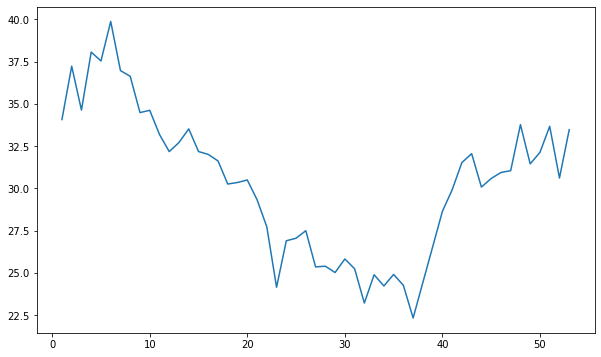

In [114]:
plt.plot(temp_new)
plt.show()

In [115]:
#kwantyle i analiza koszykowa
#wykorzystanie funkcji cut
frame = pd.DataFrame({'data1': np.random.randn(1000),
                      'data2': np.random.randn(1000)})
quartiles1 = pd.cut(frame.data1, 4)
quartiles2 = pd.cut(frame.data2, 4)
quartiles1[:10]

0    (-2.87, -1.348]
1     (0.168, 1.683]
2    (-1.348, 0.168]
3    (-1.348, 0.168]
4     (0.168, 1.683]
5    (-1.348, 0.168]
6    (-1.348, 0.168]
7    (-2.87, -1.348]
8    (-1.348, 0.168]
9    (-1.348, 0.168]
Name: data1, dtype: category
Categories (4, interval[float64]): [(-2.87, -1.348] < (-1.348, 0.168] < (0.168, 1.683] < (1.683, 3.199]]

In [118]:
quartiles2.value_counts()

(-0.3, 1.324]       517
(-1.924, -0.3]      362
(1.324, 2.948]       95
(-3.554, -1.924]     26
Name: data2, dtype: int64

In [119]:
quartiles1.value_counts()

(-1.348, 0.168]    475
(0.168, 1.683]     384
(-2.87, -1.348]     97
(1.683, 3.199]      44
Name: data1, dtype: int64

In [122]:
frame["quar2"] = quartiles2

In [123]:
frame

data1     data2            quar1           quar2
0   -1.421820 -1.055592  (-2.87, -1.348]  (-1.924, -0.3]
1    0.190760 -0.404298   (0.168, 1.683]  (-1.924, -0.3]
2   -0.896497 -1.028221  (-1.348, 0.168]  (-1.924, -0.3]
3   -0.776815 -1.607968  (-1.348, 0.168]  (-1.924, -0.3]
4    0.485577 -1.065672   (0.168, 1.683]  (-1.924, -0.3]
..        ...       ...              ...             ...
995 -1.187069  0.128447  (-1.348, 0.168]   (-0.3, 1.324]
996 -1.307540  0.197254  (-1.348, 0.168]   (-0.3, 1.324]
997  0.127171 -0.460594  (-1.348, 0.168]  (-1.924, -0.3]
998 -1.117655 -0.707311  (-1.348, 0.168]  (-1.924, -0.3]
999 -0.842514  0.105968  (-1.348, 0.168]   (-0.3, 1.324]

[1000 rows x 4 columns]

In [124]:
#wyznaczone kategorie mogą zostać przekazane bezpośrednio do metody groupby,
#a funkcja get_stats może zostać użyta wraz z f. apply
def get_stats(group):
    return {'count': group.count(),
            'min': group.min(),
            'mean': group.mean(),
            'max': group.max()}

In [125]:
grouped = frame.data1.groupby(quartiles1)

In [126]:
grouped

In [127]:
grouped.apply(get_stats).unstack()

count       min      mean       max
data1                                               
(-2.87, -1.348]   97.0 -2.863645 -1.793538 -1.353885
(-1.348, 0.168]  475.0 -1.337172 -0.489594  0.158298
(0.168, 1.683]   384.0  0.167968  0.802684  1.679557
(1.683, 3.199]    44.0  1.686206  2.126343  3.199082

In [128]:
#przykład wyznaczający statystyki dla poszczególnych kwantyli
grouping = pd.qcut(frame.data1, 10, labels=False)
#grouped = frame.data1.groupby(grouping)
#grouped.apply(get_stats).unstack()

In [130]:
grouping.value_counts()

9    100
8    100
7    100
6    100
5    100
4    100
3    100
2    100
1    100
0    100
Name: data1, dtype: int64

In [131]:
grouped = frame.data1.groupby(grouping)

In [132]:
grouped.apply(get_stats).unstack()

count       min      mean       max
data1                                     
0      100.0 -2.863645 -1.779780 -1.333375
1      100.0 -1.325604 -1.105455 -0.886536
2      100.0 -0.882377 -0.712329 -0.560642
3      100.0 -0.560345 -0.398091 -0.253608
4      100.0 -0.251595 -0.128512 -0.012281
5      100.0 -0.011688  0.117153  0.253076
6      100.0  0.255709  0.388380  0.526363
7      100.0  0.531094  0.713657  0.902227
8      100.0  0.903907  1.082586  1.292696
9      100.0  1.293938  1.774987  3.199082

In [ ]:
#Zadanie I
#1. Stwórz ramkę danych zawierającą wartość dowolnej zmiennej (losowanie), dla 10 stanów USA, których nazwy będą indeksem.
#Pięć stanów powinno pochodzić z zachodniego, a pięć ze wschodniego wybrzeża.
#2. Wprowadź cztery braki danych do zbioru - dwa dla stanów W i dwa dla stnów E.
#3. Wypełnij braki danych wartością średnią dla stanów W i E.
#4. Wypełnij braki danych wartością 0.5 dla stnów W i wartością -0.77 dla stnów E.

In [133]:
states = ['Ohio', 'New York', 'Vermont', 'Florida', 'Georgia',
          'Oregon', 'Nevada', 'California', 'Idaho', 'Arizona']

In [134]:
group_key = ['East'] * 5 + ['West'] * 5

In [135]:
data = pd.Series(np.random.randn(10), index=states)
data

Ohio          1.024205
New York      0.466422
Vermont       1.224504
Florida      -0.730267
Georgia       0.642725
Oregon       -1.003394
Nevada        0.035993
California   -0.016050
Idaho        -1.839092
Arizona      -1.090633
dtype: float64

In [136]:
group_key

['East',
 'East',
 'East',
 'East',
 'East',
 'West',
 'West',
 'West',
 'West',
 'West']

In [137]:
data[['Vermont', 'Ohio', 'Nevada', 'Idaho']] = np.nan
data

Ohio               NaN
New York      0.466422
Vermont            NaN
Florida      -0.730267
Georgia       0.642725
Oregon       -1.003394
Nevada             NaN
California   -0.016050
Idaho              NaN
Arizona      -1.090633
dtype: float64

In [138]:
data.groupby(group_key).mean()

East    0.126293
West   -0.703359
dtype: float64

In [139]:
fill_mean = lambda g: g.fillna(g.mean())
data.groupby(group_key).apply(fill_mean)

Ohio          0.126293
New York      0.466422
Vermont       0.126293
Florida      -0.730267
Georgia       0.642725
Oregon       -1.003394
Nevada       -0.703359
California   -0.016050
Idaho        -0.703359
Arizona      -1.090633
dtype: float64

In [140]:
fill_values = {'East': -0.77, 'West': 0.5}
fill_func = lambda g: g.fillna(fill_values[g.name])
data.groupby(group_key).apply(fill_func)

Ohio         -0.770000
New York      0.466422
Vermont      -0.770000
Florida      -0.730267
Georgia       0.642725
Oregon       -1.003394
Nevada        0.500000
California   -0.016050
Idaho         0.500000
Arizona      -1.090633
dtype: float64

In [ ]:
#Zadanie II
#1. Stwórz ramkę danych zawierającą listę kart do gry np. w oczko: nazwy kart i ich wartości.
#Kolory oznacz za pomocą liter H — kier, S — pik, C — trefl, D — karo.
#2. Stwórz funkcję losującą wybraną liczbę kart.
#3. Wylosuj dwie karty każdego koloru.

In [141]:
#Rozwiązanie Zadania III
#H — kier, S — pik, C — trefl, D — karo
suits = ['H', 'S', 'C', 'D']
card_val = (list(range(1, 11)) + [10] * 3) * 4
base_names = ['A'] + list(range(2, 11)) + ['J', 'K', 'Q']
cards = []

In [143]:
base_names

['A', 2, 3, 4, 5, 6, 7, 8, 9, 10, 'J', 'K', 'Q']

In [144]:
for suit in ['H', 'S', 'C', 'D']:
    cards.extend(str(num) + suit for num in base_names)

In [145]:
cards

['AH',
 '2H',
 '3H',
 '4H',
 '5H',
 '6H',
 '7H',
 '8H',
 '9H',
 '10H',
 'JH',
 'KH',
 'QH',
 'AS',
 '2S',
 '3S',
 '4S',
 '5S',
 '6S',
 '7S',
 '8S',
 '9S',
 '10S',
 'JS',
 'KS',
 'QS',
 'AC',
 '2C',
 '3C',
 '4C',
 '5C',
 '6C',
 '7C',
 '8C',
 '9C',
 '10C',
 'JC',
 'KC',
 'QC',
 'AD',
 '2D',
 '3D',
 '4D',
 '5D',
 '6D',
 '7D',
 '8D',
 '9D',
 '10D',
 'JD',
 'KD',
 'QD']

In [146]:
deck = pd.Series(card_val, index=cards)

In [147]:
deck

AH      1
2H      2
3H      3
4H      4
5H      5
6H      6
7H      7
8H      8
9H      9
10H    10
JH     10
KH     10
QH     10
AS      1
2S      2
3S      3
4S      4
5S      5
6S      6
7S      7
8S      8
9S      9
10S    10
JS     10
KS     10
QS     10
AC      1
2C      2
3C      3
4C      4
5C      5
6C      6
7C      7
8C      8
9C      9
10C    10
JC     10
KC     10
QC     10
AD      1
2D      2
3D      3
4D      4
5D      5
6D      6
7D      7
8D      8
9D      9
10D    10
JD     10
KD     10
QD     10
dtype: int64

In [151]:
def draw(deck, n=5):
    return deck.sample(n)
draw(deck)

AS     1
7C     7
KC    10
QC    10
KH    10
dtype: int64

In [153]:
draw(deck, n=3)

7C     7
8D     8
QS    10
dtype: int64

In [154]:
deck.index

Index(['AH', '2H', '3H', '4H', '5H', '6H', '7H', '8H', '9H', '10H', 'JH', 'KH',
       'QH', 'AS', '2S', '3S', '4S', '5S', '6S', '7S', '8S', '9S', '10S', 'JS',
       'KS', 'QS', 'AC', '2C', '3C', '4C', '5C', '6C', '7C', '8C', '9C', '10C',
       'JC', 'KC', 'QC', 'AD', '2D', '3D', '4D', '5D', '6D', '7D', '8D', '9D',
       '10D', 'JD', 'KD', 'QD'],
      dtype='object')

In [155]:
get_suit = lambda card: card[-1] #Ostatnia litera oznacza kolor.
deck.groupby(get_suit).apply(draw, n=2)

C  JC    10
   KC    10
D  5D     5
   4D     4
H  QH    10
   9H     9
S  2S     2
   8S     8
dtype: int64

In [156]:
deck.groupby(get_suit, group_keys=False).apply(draw, n=2)

KC     10
4C      4
10D    10
2D      2
KH     10
JH     10
10S    10
8S      8
dtype: int64

In [157]:
list(range(1,10))

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [158]:
tips

total_bill   tip smoker   day    time  size   tip_pct
0         16.99  1.01     No   Sun  Dinner     2  0.059447
1         10.34  1.66     No   Sun  Dinner     3  0.160542
2         21.01  3.50     No   Sun  Dinner     3  0.166587
3         23.68  3.31     No   Sun  Dinner     2  0.139780
4         24.59  3.61     No   Sun  Dinner     4  0.146808
..          ...   ...    ...   ...     ...   ...       ...
239       29.03  5.92     No   Sat  Dinner     3  0.203927
240       27.18  2.00    Yes   Sat  Dinner     2  0.073584
241       22.67  2.00    Yes   Sat  Dinner     2  0.088222
242       17.82  1.75     No   Sat  Dinner     2  0.098204
243       18.78  3.00     No  Thur  Dinner     2  0.159744

[244 rows x 7 columns]

In [159]:
#Tabele przestawne
#domyślną metodą agregacji jest średnia
#chcemy wyzanczyć wartości średnie zmiennych liczbowych z podziałem na dzień tygodnia i informacje o paleniu
tips.pivot_table(index=['day', 'smoker'])

size       tip   tip_pct  total_bill
day  smoker                                          
Fri  No      2.250000  2.812500  0.151650   18.420000
     Yes     2.066667  2.714000  0.174783   16.813333
Sat  No      2.555556  3.102889  0.158048   19.661778
     Yes     2.476190  2.875476  0.147906   21.276667
Sun  No      2.929825  3.167895  0.160113   20.506667
     Yes     2.578947  3.516842  0.187250   24.120000
Thur No      2.488889  2.673778  0.160298   17.113111
     Yes     2.352941  3.030000  0.163863   19.190588

In [160]:
#chcemy wykonać agregację tylko kolumn tip_pct i size z podziałem na porę dnia i dzień tygodnia,
#natomiast informacje o paleniu mają być umieszczone w kolumnach
tips.pivot_table(['tip_pct', 'size'], index=['time', 'day'], columns='smoker')

size             tip_pct          
smoker             No       Yes        No       Yes
time   day                                         
Dinner Fri   2.000000  2.222222  0.139622  0.165347
       Sat   2.555556  2.476190  0.158048  0.147906
       Sun   2.929825  2.578947  0.160113  0.187250
       Thur  2.000000       NaN  0.159744       NaN
Lunch  Fri   3.000000  1.833333  0.187735  0.188937
       Thur  2.500000  2.352941  0.160311  0.163863

In [161]:
#wykorzystanie sum częściowych - super fajne
tips.pivot_table(['tip_pct', 'size'],
                 index=['time', 'day'],
                 columns='smoker',
                 margins=True)

size                       tip_pct                    
smoker             No       Yes       All        No       Yes       All
time   day                                                             
Dinner Fri   2.000000  2.222222  2.166667  0.139622  0.165347  0.158916
       Sat   2.555556  2.476190  2.517241  0.158048  0.147906  0.153152
       Sun   2.929825  2.578947  2.842105  0.160113  0.187250  0.166897
       Thur  2.000000       NaN  2.000000  0.159744       NaN  0.159744
Lunch  Fri   3.000000  1.833333  2.000000  0.187735  0.188937  0.188765
       Thur  2.500000  2.352941  2.459016  0.160311  0.163863  0.161301
All          2.668874  2.408602  2.569672  0.159328  0.163196  0.160803

In [162]:
#wykorzystanie innych funkcji agregujących
tips.pivot_table('tip_pct',
                 index=['time', 'smoker'],
                 columns='day',
                 aggfunc=len,
                 margins=True)

day             Fri   Sat   Sun  Thur    All
time   smoker                               
Dinner No       3.0  45.0  57.0   1.0  106.0
       Yes      9.0  42.0  19.0   NaN   70.0
Lunch  No       1.0   NaN   NaN  44.0   45.0
       Yes      6.0   NaN   NaN  17.0   23.0
All            19.0  87.0  76.0  62.0  244.0

In [167]:
#wykorzystanie innych funkcji agregujących
tips.pivot_table('tip_pct',
                 index=['time', 'smoker'],
                 columns='day',
                 aggfunc=np.size,
                 margins=True)

day             Fri   Sat   Sun  Thur    All
time   smoker                               
Dinner No       3.0  45.0  57.0   1.0  106.0
       Yes      9.0  42.0  19.0   NaN   70.0
Lunch  No       1.0   NaN   NaN  44.0   45.0
       Yes      6.0   NaN   NaN  17.0   23.0
All            19.0  87.0  76.0  62.0  244.0

In [171]:
#uzupełnianie braków danych w tabeli przestawnej
tips.pivot_table('tip_pct',
                 index=['time', 'size', 'smoker'],
                 columns='day',
                 aggfunc='mean',
                 fill_value=0.0)

day                      Fri       Sat       Sun      Thur
time   size smoker                                        
Dinner 1    No           NaN  0.137931       NaN       NaN
            Yes          NaN  0.325733       NaN       NaN
       2    No      0.139622  0.162705  0.168859  0.159744
            Yes     0.171297  0.148668  0.207893       NaN
       3    No           NaN  0.154661  0.152663       NaN
            Yes          NaN  0.144995  0.152660       NaN
       4    No           NaN  0.150096  0.148143       NaN
            Yes     0.117750  0.124515  0.193370       NaN
       5    No           NaN       NaN  0.206928       NaN
            Yes          NaN  0.106572  0.065660       NaN
       6    No           NaN       NaN  0.103799       NaN
Lunch  1    No           NaN       NaN       NaN  0.181728
            Yes     0.223776       NaN       NaN       NaN
       2    No           NaN       NaN       NaN  0.166005
            Yes     0.181969       NaN       NaN  0.158843
       3    No      0.187735       NaN       NaN  0.084246
            Yes          NaN       NaN       NaN  0.204952
       4    No           NaN       NaN       NaN  0.138919
            Yes          NaN       NaN       NaN  0.155410
       5    No           NaN       NaN       NaN  0.121389
       6    No           NaN       NaN       NaN  0.173706

In [172]:
#tabele krzyżowe
#budujemy ramkę danych (głównie zmienne kategoryczne)
from io import StringIO
data = """\
Sample  Nationality  Handedness
1   USA  Right-handed
2   Japan    Left-handed
3   USA  Right-handed
4   Japan    Right-handed
5   Japan    Left-handed
6   Japan    Right-handed
7   USA  Right-handed
8   USA  Left-handed
9   Japan    Right-handed
10  USA  Right-handed"""
data = pd.read_table(StringIO(data), sep='\s+')

data

Sample Nationality    Handedness
0       1         USA  Right-handed
1       2       Japan   Left-handed
2       3         USA  Right-handed
3       4       Japan  Right-handed
4       5       Japan   Left-handed
5       6       Japan  Right-handed
6       7         USA  Right-handed
7       8         USA   Left-handed
8       9       Japan  Right-handed
9      10         USA  Right-handed

In [175]:
#tabele krzyżowe z wybranych zmiennych
pd.crosstab(data.Nationality, data.Handedness, margins=True)

Handedness   Left-handed  Right-handed  All
Nationality                                
Japan                  2             3    5
USA                    1             4    5
All                    3             7   10

In [176]:
pd.crosstab([tips.time, tips.day], tips.smoker, margins=True)

smoker        No  Yes  All
time   day                
Dinner Fri     3    9   12
       Sat    45   42   87
       Sun    57   19   76
       Thur    1    0    1
Lunch  Fri     1    6    7
       Thur   44   17   61
All          151   93  244